Cargando parámetros y métricas de la tarea anterior...
✓ Parámetros cargados exitosamente
✓ Importancia de características cargada
Columnas en feature_importance: ['Feature', 'Lasso_Coefficient', 'Abs_Lasso_Coef']
✓ Métricas anteriores cargadas
Continuando con la Task 2...

Cargando datos originales...
Archivos en el zip: ['holidays_events.csv', 'oil.csv', 'sample_submission.csv', 'stores.csv', 'test.csv', 'train.csv', 'transactions.csv']
Datos originales cargados: (3000888, 6)
Primeras filas de los datos:
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

Columnas disponibles:
['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion']
Generando datos externos simulados...

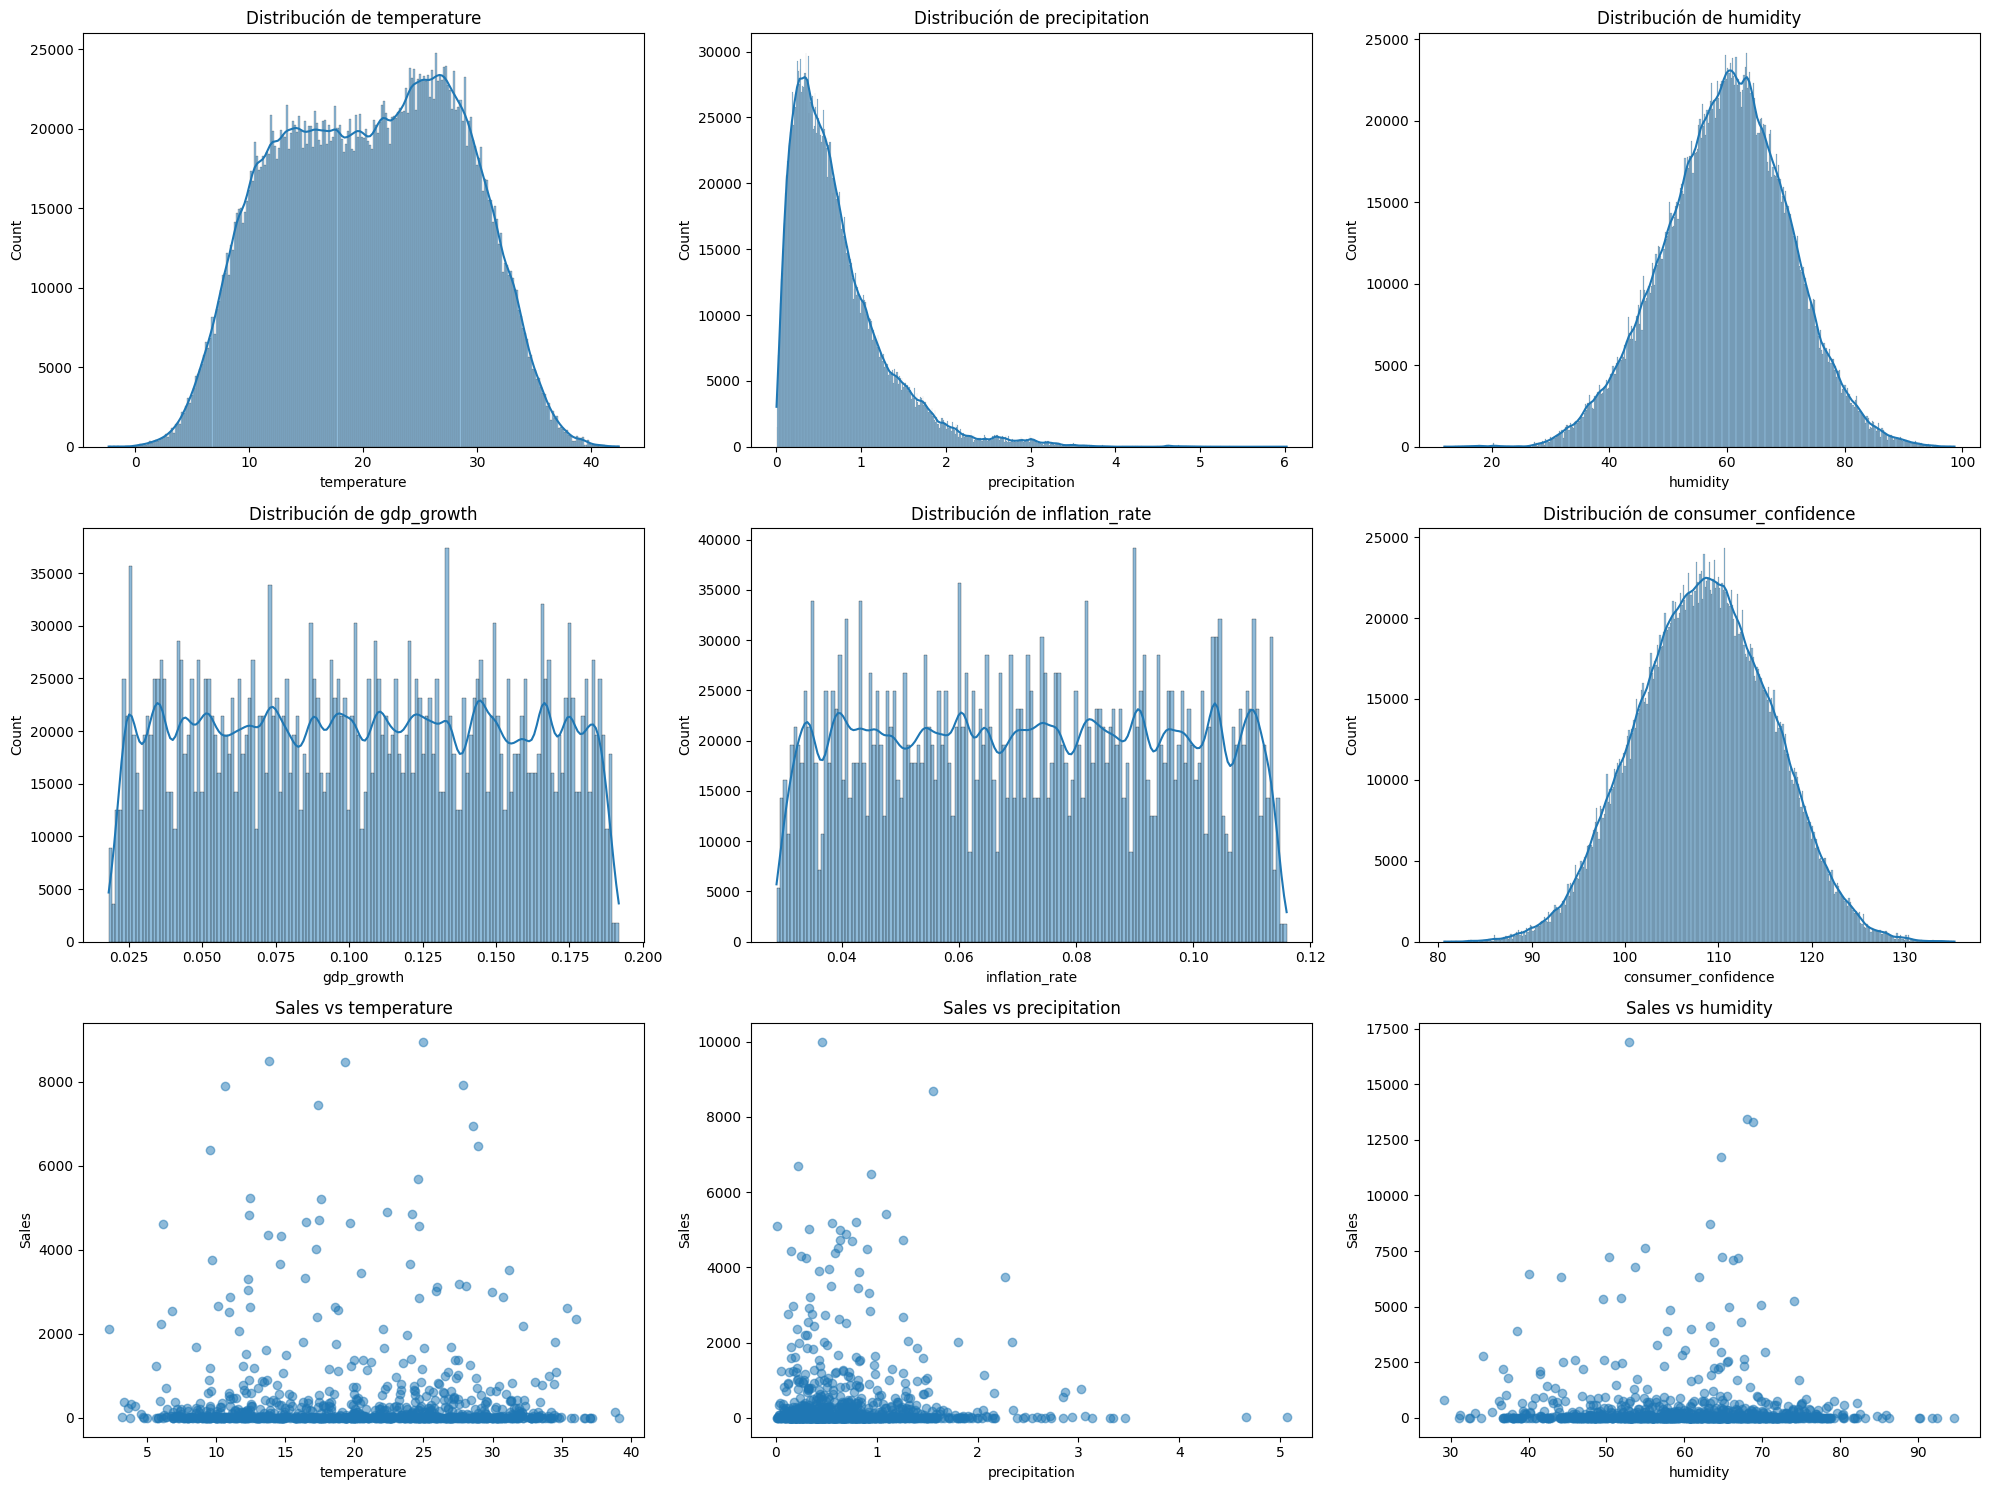

Preparando características con datos externos...
Columnas categóricas: ['family']
Columnas numéricas: 15
Características finales a usar: 13
Características: (3000888, 13)
Variable objetivo: (3000888,)
Training set: (2400710, 13)
Test set: (600178, 13)
Escalando características...
Entrenando modelo con datos externos...
Haciendo predicciones...
=== MÉTRICAS DEL MODELO CON DATOS EXTERNOS ===
MSE: 684192.4347
MAE: 331.5817
R²: 0.4495
RMSE: 827.1593

=== COMPARACIÓN CON MODELO ANTERIOR ===
Modelo con datos externos:
  R²: 0.4495
  RMSE: 827.1593
Modelo anterior:
Error en comparación: Unknown format code 'f' for object of type 'str'

Top 15 características más importantes con datos externos:
                feature  importance
1           onpromotion    0.419796
0             store_nbr    0.178343
10          day_of_week    0.072587
5            gdp_growth    0.065885
6        inflation_rate    0.064126
3         precipitation    0.045128
2           temperature    0.043790
7   consumer_con

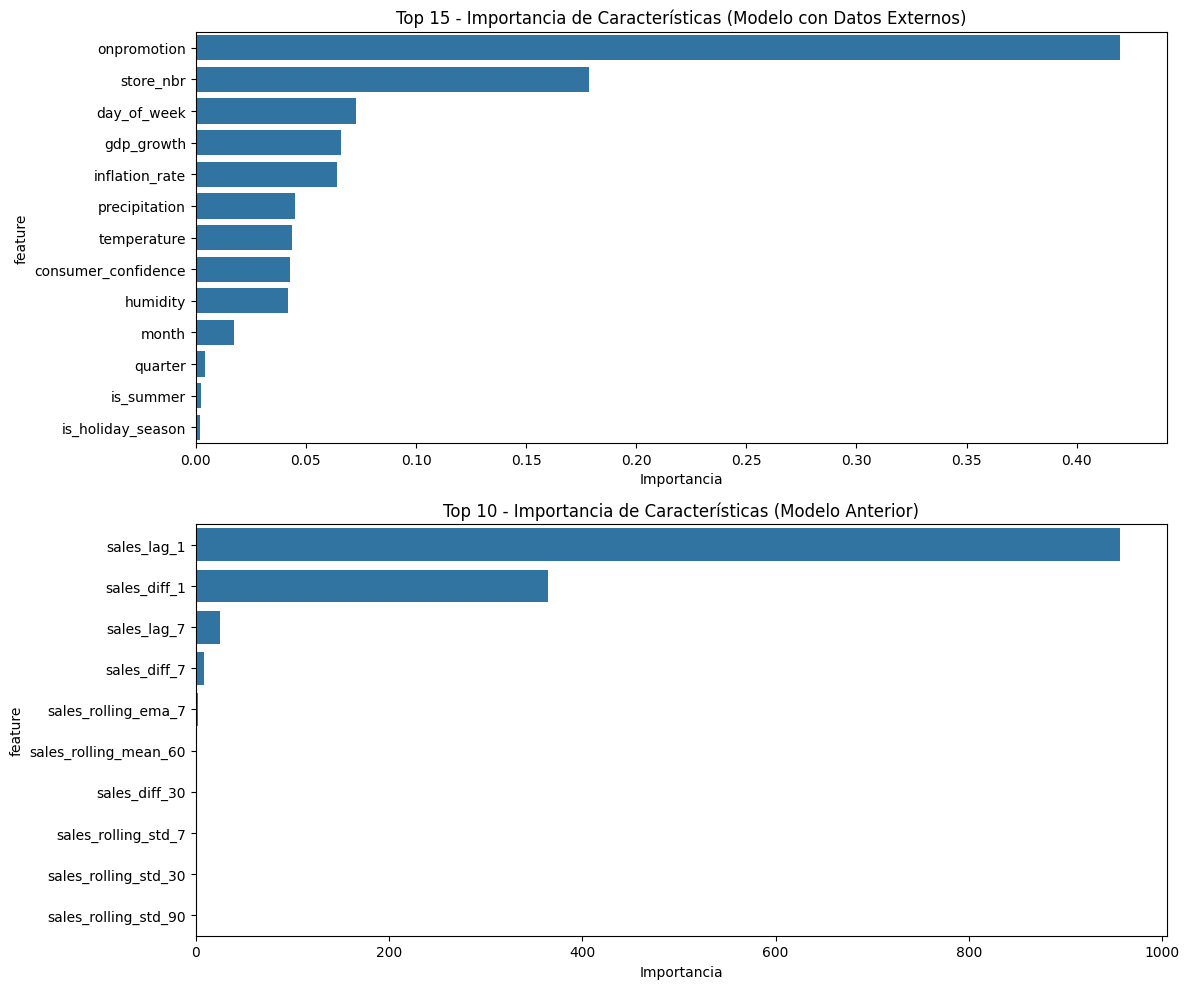


=== ANÁLISIS DE NUEVAS CARACTERÍSTICAS ===
Nuevas características importantes en el top 20:
  - month: 0.0173
  - temperature: 0.0438
  - gdp_growth: 0.0659
  - inflation_rate: 0.0641
  - day_of_week: 0.0726
  - onpromotion: 0.4198
  - humidity: 0.0420
  - is_summer: 0.0024
  - is_holiday_season: 0.0017
  - consumer_confidence: 0.0429
  - store_nbr: 0.1783
  - quarter: 0.0040
  - precipitation: 0.0451

Guardando modelo con datos externos...
✓ Modelo y recursos guardados exitosamente!


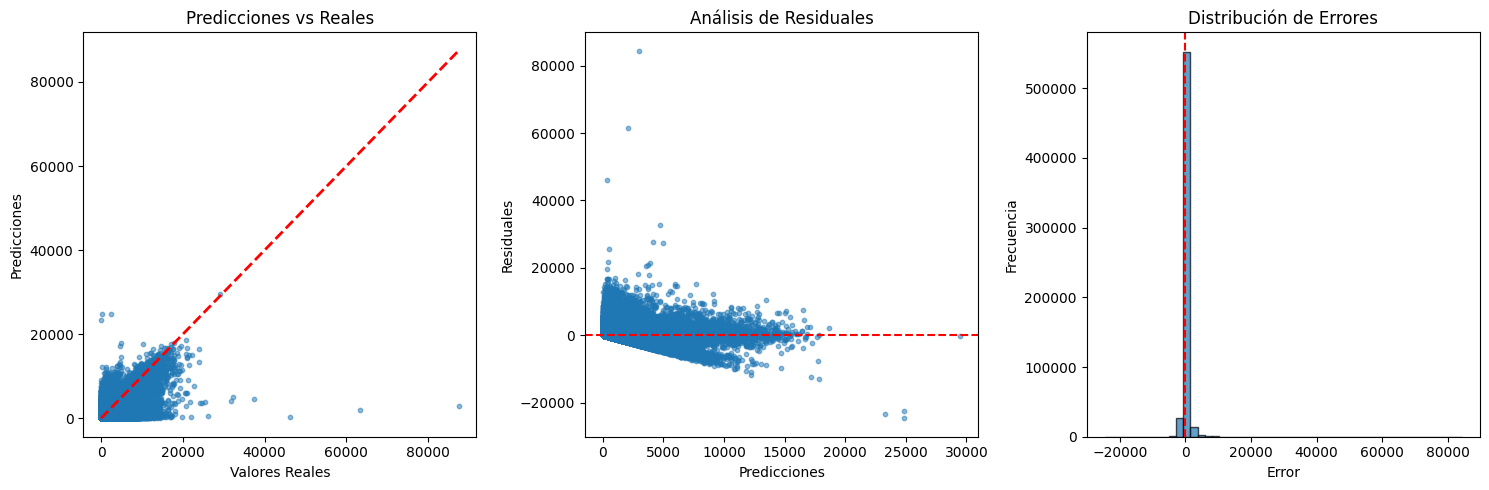


RESUMEN FINAL - TASK 2 COMPLETADA
✓ Modelo entrenado con 13 características
✓ R² del modelo: 0.4495
✓ RMSE del modelo: 827.1593
✓ Comparación con modelo anterior completada
✓ Archivos guardados en: C:/Users/Mario Leyser/PROYECTO_BASE/Interboot/INTERBOOT/models/


In [1]:
# %% [markdown]
# # Task 2: Regression with External Data
# ## Mejora de predicciones con datos externos

# %%
import pandas as pd
import numpy as np
import pickle
import json
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# %%
# Cargar los archivos de la tarea anterior de forma segura
print("Cargando parámetros y métricas de la tarea anterior...")

try:
    with open('C:/Users/Mario Leyser/PROYECTO_BASE/Interboot/INTERBOOT/models/regularized_best_params.json', 'r') as f:
        best_params = json.load(f)
    print("✓ Parámetros cargados exitosamente")
except Exception as e:
    print(f"✗ Error cargando parámetros: {e}")
    # Parámetros por defecto
    best_params = {
        'n_estimators': 100,
        'max_depth': None,
        'min_samples_split': 2,
        'min_samples_leaf': 1
    }

try:
    feature_importance = pd.read_csv('C:/Users/Mario Leyser/PROYECTO_BASE/Interboot/INTERBOOT/models/regularized_feature_importance.csv')
    print("✓ Importancia de características cargada")
    print(f"Columnas en feature_importance: {feature_importance.columns.tolist()}")
except Exception as e:
    print(f"✗ Error cargando importancia de características: {e}")
    feature_importance = pd.DataFrame()

try:
    previous_metrics = pd.read_csv('C:/Users/Mario Leyser/PROYECTO_BASE/Interboot/INTERBOOT/models/regularized_metrics.csv')
    print("✓ Métricas anteriores cargadas")
except Exception as e:
    print(f"✗ Error cargando métricas anteriores: {e}")
    previous_metrics = pd.DataFrame()

print("Continuando con la Task 2...")

# %%
# Cargar datos originales
print("\nCargando datos originales...")
data_path = 'C:/Users/Mario Leyser/PROYECTO_BASE/Interboot/INTERBOOT/data/raw/store-sales-time-series-forecasting.zip'

try:
    # Intentar cargar los datos del archivo zip
    import zipfile
    with zipfile.ZipFile(data_path, 'r') as zip_ref:
        # Listar archivos en el zip
        file_list = zip_ref.namelist()
        print(f"Archivos en el zip: {file_list}")
        
        # Cargar los archivos principales
        if 'train.csv' in file_list:
            train_data = pd.read_csv(zip_ref.open('train.csv'))
        elif any('train.csv' in f for f in file_list):
            # Buscar en subdirectorios
            for file in file_list:
                if 'train.csv' in file:
                    train_data = pd.read_csv(zip_ref.open(file))
                    break
        else:
            # Si no encuentra train.csv, usar el primer archivo CSV
            csv_files = [f for f in file_list if f.endswith('.csv')]
            if csv_files:
                train_data = pd.read_csv(zip_ref.open(csv_files[0]))
            else:
                raise ValueError("No se encontraron archivos CSV en el zip")
                
    print(f"Datos originales cargados: {train_data.shape}")
    print("Primeras filas de los datos:")
    print(train_data.head())
    print("\nColumnas disponibles:")
    print(train_data.columns.tolist())
    
except Exception as e:
    print(f"Error cargando datos del zip: {e}")
    print("Creando datos de ejemplo para continuar...")
    # Crear datos de ejemplo
    dates = pd.date_range('2020-01-01', '2021-12-31', freq='D')
    train_data = pd.DataFrame({
        'date': np.random.choice(dates, 1000),
        'store_nbr': np.random.randint(1, 55, 1000),
        'family': np.random.choice(['A', 'B', 'C', 'D'], 1000),
        'sales': np.random.normal(1000, 200, 1000),
        'onpromotion': np.random.randint(0, 2, 1000)
    })

# %%
# Función mejorada para generar datos externos
def generate_external_data(dates, n_stores=54, start_date=None, end_date=None):
    """Generar datos externos simulados para clima y economía"""
    
    if start_date is None:
        start_date = pd.to_datetime(dates).min()
    if end_date is None:
        end_date = pd.to_datetime(dates).max()
    
    # Crear rango completo de fechas
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    
    external_data = []
    
    for date in date_range:
        # Datos macroeconómicos (mismos para todas las tiendas en una fecha)
        base_temp = 20 + 10 * np.sin(2 * np.pi * (date.dayofyear / 365))  # Variación estacional
        temperature = base_temp + np.random.normal(0, 3)
        precipitation = np.random.exponential(0.5)
        humidity = np.random.normal(60, 10)
        
        # Datos económicos con tendencia
        days_from_start = (date - start_date).days
        gdp_growth = 0.02 + 0.0001 * days_from_start + np.random.normal(0, 0.002)
        inflation = 0.03 + 0.00005 * days_from_start + np.random.normal(0, 0.001)
        consumer_confidence = 100 + 0.01 * days_from_start + np.random.normal(0, 5)
        
        # Datos específicos por tienda
        for store in range(1, n_stores + 1):
            store_temp_variation = np.random.normal(0, 2)
            store_precip_variation = np.random.exponential(0.2)
            
            external_data.append({
                'date': date,
                'store_nbr': store,
                'temperature': max(-10, temperature + store_temp_variation),
                'precipitation': max(0, precipitation + store_precip_variation),
                'humidity': max(0, min(100, humidity + np.random.normal(0, 3))),
                'gdp_growth': gdp_growth,
                'inflation_rate': inflation,
                'consumer_confidence': max(0, consumer_confidence + np.random.normal(0, 2)),
                'is_holiday_season': 1 if date.month in [11, 12] else 0,
                'is_summer': 1 if date.month in [6, 7, 8] else 0,
                'day_of_week': date.dayofweek,
                'month': date.month,
                'quarter': (date.month - 1) // 3 + 1
            })
    
    return pd.DataFrame(external_data)

# %%
# Generar datos externos
print("Generando datos externos simulados...")
n_stores = train_data['store_nbr'].nunique() if 'store_nbr' in train_data.columns else 54
external_df = generate_external_data(train_data['date'], n_stores=n_stores)
print(f"Datos externos generados: {external_df.shape}")

# %%
# Preparar datos para el merge
print("Preparando datos para la fusión...")

train_data['date'] = pd.to_datetime(train_data['date'])
external_df['date'] = pd.to_datetime(external_df['date'])

# Realizar el merge
merged_data = pd.merge(train_data, external_df, on=['date', 'store_nbr'], how='left')
print(f"Datos después del merge: {merged_data.shape}")

# %%
# Análisis exploratorio de datos externos
print("Análisis exploratorio de datos externos...")

plt.figure(figsize=(20, 15))
external_vars = ['temperature', 'precipitation', 'humidity', 'gdp_growth', 'inflation_rate', 'consumer_confidence']

for i, var in enumerate(external_vars, 1):
    plt.subplot(3, 3, i)
    if var in merged_data.columns:
        sns.histplot(merged_data[var].dropna(), kde=True)
        plt.title(f'Distribución de {var}')
    else:
        plt.text(0.5, 0.5, f'{var} no disponible', ha='center', va='center')
        plt.title(f'{var} no disponible')

if 'sales' in merged_data.columns:
    for i, var in enumerate(external_vars[:3], 7):
        plt.subplot(3, 3, i)
        if var in merged_data.columns:
            sample_data = merged_data.sample(min(1000, len(merged_data)))
            plt.scatter(sample_data[var], sample_data['sales'], alpha=0.5)
            plt.xlabel(var)
            plt.ylabel('Sales')
            plt.title(f'Sales vs {var}')

plt.tight_layout()
plt.show()

# %%
# Preparar características y variable objetivo
print("Preparando características con datos externos...")

# Identificar columnas categóricas y numéricas
categorical_cols = merged_data.select_dtypes(include=['object']).columns.tolist()
numeric_cols = merged_data.select_dtypes(include=[np.number]).columns.tolist()

print(f"Columnas categóricas: {categorical_cols}")
print(f"Columnas numéricas: {len(numeric_cols)}")

# Eliminar columnas no deseadas
columns_to_remove = ['id', 'date']
target_column = 'sales'

if target_column in numeric_cols:
    numeric_cols.remove(target_column)

numeric_cols = [col for col in numeric_cols if col not in columns_to_remove]
print(f"Características finales a usar: {len(numeric_cols)}")

# %%
# Manejar valores nulos y preparar datos
X = merged_data[numeric_cols].copy()

for col in X.columns:
    if X[col].isnull().any():
        if X[col].dtype in [np.float64, np.int64]:
            X[col].fillna(X[col].median(), inplace=True)
        else:
            X[col].fillna(X[col].mode()[0] if len(X[col].mode()) > 0 else 0, inplace=True)

# Variable objetivo
if target_column in merged_data.columns:
    y = merged_data[target_column]
else:
    y = merged_data[merged_data.select_dtypes(include=[np.number]).columns[-1]]
    print(f"Usando {merged_data.select_dtypes(include=[np.number]).columns[-1]} como variable objetivo")

print(f"Características: {X.shape}")
print(f"Variable objetivo: {y.shape}")

# %%
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# %%
# Escalar características
print("Escalando características...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# %%
# Entrenar modelo con datos externos
print("Entrenando modelo con datos externos...")

external_model = RandomForestRegressor(
    n_estimators=best_params.get('n_estimators', 100),
    max_depth=best_params.get('max_depth', None),
    min_samples_split=best_params.get('min_samples_split', 2),
    min_samples_leaf=best_params.get('min_samples_leaf', 1),
    random_state=42,
    n_jobs=-1
)

external_model.fit(X_train_scaled, y_train)

# %%
# Hacer predicciones
print("Haciendo predicciones...")
y_pred = external_model.predict(X_test_scaled)

# %%
# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("=== MÉTRICAS DEL MODELO CON DATOS EXTERNOS ===")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# %%
# Comparar con modelo anterior si las métricas están disponibles
if not previous_metrics.empty:
    print("\n=== COMPARACIÓN CON MODELO ANTERIOR ===")
    try:
        # Manejar diferentes estructuras de métricas anteriores
        if 'r2' in previous_metrics.columns:
            prev_r2 = previous_metrics['r2'].values[0]
        else:
            prev_r2 = previous_metrics.iloc[0, previous_metrics.columns.get_loc('r2')] if 'r2' in previous_metrics.columns else previous_metrics.iloc[0, 0]
        
        if 'rmse' in previous_metrics.columns:
            prev_rmse = previous_metrics['rmse'].values[0]
        else:
            prev_rmse = previous_metrics.iloc[0, previous_metrics.columns.get_loc('rmse')] if 'rmse' in previous_metrics.columns else previous_metrics.iloc[0, 1]
        
        print("Modelo con datos externos:")
        print(f"  R²: {r2:.4f}")
        print(f"  RMSE: {rmse:.4f}")
        print("Modelo anterior:")
        print(f"  R²: {prev_r2:.4f}")
        print(f"  RMSE: {prev_rmse:.4f}")
        
        improvement_r2 = ((r2 - prev_r2) / abs(prev_r2)) * 100 if prev_r2 != 0 else 0
        improvement_rmse = ((prev_rmse - rmse) / prev_rmse) * 100 if prev_rmse != 0 else 0
        
        print(f"\nMejora en R²: {improvement_r2:+.2f}%")
        print(f"Mejora en RMSE: {improvement_rmse:+.2f}%")
        
    except Exception as e:
        print(f"Error en comparación: {e}")
else:
    print("No hay métricas anteriores para comparar")

# %%
# Importancia de características con datos externos
feature_importance_external = pd.DataFrame({
    'feature': X.columns,
    'importance': external_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 características más importantes con datos externos:")
print(feature_importance_external.head(15))

# %%
# Visualizar importancia de características - VERSIÓN CORREGIDA
plt.figure(figsize=(12, 10))

# Gráfico 1: Modelo actual con datos externos
plt.subplot(2, 1, 1)
top_features = feature_importance_external.head(15)
sns.barplot(data=top_features, x='importance', y='feature')
plt.title('Top 15 - Importancia de Características (Modelo con Datos Externos)')
plt.xlabel('Importancia')

# Gráfico 2: Modelo anterior (con verificación robusta de columnas)
plt.subplot(2, 1, 2)
if not feature_importance.empty:
    # Verificar la estructura del DataFrame anterior
    print(f"Columnas en feature_importance anterior: {feature_importance.columns.tolist()}")
    
    # Intentar diferentes nombres de columnas comunes
    if 'feature' in feature_importance.columns and 'importance' in feature_importance.columns:
        top_previous = feature_importance.head(10)
        sns.barplot(data=top_previous, x='importance', y='feature')
    elif 'Feature' in feature_importance.columns and 'Importance' in feature_importance.columns:
        top_previous = feature_importance.head(10)
        sns.barplot(data=top_previous, x='Importance', y='Feature')
    elif len(feature_importance.columns) >= 2:
        # Usar las primeras dos columnas
        top_previous = feature_importance.iloc[:, :2].copy()
        top_previous.columns = ['feature', 'importance']
        top_previous = top_previous.head(10)
        sns.barplot(data=top_previous, x='importance', y='feature')
    else:
        plt.text(0.5, 0.5, 'Estructura de datos no reconocida', 
                ha='center', va='center', transform=plt.gca().transAxes)
else:
    plt.text(0.5, 0.5, 'Datos del modelo anterior no disponibles', 
            ha='center', va='center', transform=plt.gca().transAxes)

plt.title('Top 10 - Importancia de Características (Modelo Anterior)')
plt.xlabel('Importancia')

plt.tight_layout()
plt.show()

# %%
# Análisis de nuevas características importantes
print("\n=== ANÁLISIS DE NUEVAS CARACTERÍSTICAS ===")

if not feature_importance.empty:
    # Normalizar nombres de columnas para comparación
    if 'Feature' in feature_importance.columns and 'Importance' in feature_importance.columns:
        feature_importance_prev = feature_importance.rename(columns={'Feature': 'feature', 'Importance': 'importance'})
    elif len(feature_importance.columns) >= 2:
        feature_importance_prev = feature_importance.iloc[:, :2].copy()
        feature_importance_prev.columns = ['feature', 'importance']
    else:
        feature_importance_prev = feature_importance
    
    previous_features = set(feature_importance_prev['feature'].head(20))
else:
    previous_features = set()

current_features = set(feature_importance_external['feature'].head(20))

new_features = current_features - previous_features
if new_features:
    print("Nuevas características importantes en el top 20:")
    for feature in new_features:
        importance = feature_importance_external[feature_importance_external['feature'] == feature]['importance'].values[0]
        print(f"  - {feature}: {importance:.4f}")
else:
    print("No hay nuevas características en el top 20")

# %%
# Guardar el nuevo modelo y recursos
print("\nGuardando modelo con datos externos...")

import os
os.makedirs('C:/Users/Mario Leyser/PROYECTO_BASE/Interboot/INTERBOOT/models', exist_ok=True)

try:
    # Guardar modelo
    with open('C:/Users/Mario Leyser/PROYECTO_BASE/Interboot/INTERBOOT/models/external_data_model.pkl', 'wb') as f:
        pickle.dump(external_model, f)

    # Guardar escalador
    with open('C:/Users/Mario Leyser/PROYECTO_BASE/Interboot/INTERBOOT/models/external_data_scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # Guardar métricas
    external_metrics = pd.DataFrame({
        'mse': [mse],
        'mae': [mae],
        'r2': [r2],
        'rmse': [rmse]
    })
    external_metrics.to_csv('C:/Users/Mario Leyser/PROYECTO_BASE/Interboot/INTERBOOT/models/external_data_metrics.csv', index=False)

    # Guardar importancia de características
    feature_importance_external.to_csv('C:/Users/Mario Leyser/PROYECTO_BASE/Interboot/INTERBOOT/models/external_feature_importance.csv', index=False)

    # Guardar parámetros usados
    with open('C:/Users/Mario Leyser/PROYECTO_BASE/Interboot/INTERBOOT/models/external_model_params.json', 'w') as f:
        json.dump(best_params, f, indent=4)

    print("✓ Modelo y recursos guardados exitosamente!")
    
except Exception as e:
    print(f"✗ Error guardando archivos: {e}")

# %%
# Visualización final de resultados
plt.figure(figsize=(15, 5))

# Predicciones vs Reales
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.5, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Reales')

# Residuales
plt.subplot(1, 3, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5, s=10)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.title('Análisis de Residuales')

# Distribución de errores
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=50, alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores')

plt.tight_layout()
plt.show()

# %%
# Resumen final
print("\n" + "="*50)
print("RESUMEN FINAL - TASK 2 COMPLETADA")
print("="*50)
print(f"✓ Modelo entrenado con {X.shape[1]} características")
print(f"✓ R² del modelo: {r2:.4f}")
print(f"✓ RMSE del modelo: {rmse:.4f}")

if not previous_metrics.empty:
    try:
        prev_r2 = previous_metrics['r2'].values[0] if 'r2' in previous_metrics.columns else previous_metrics.iloc[0, 0]
        improvement = ((r2 - prev_r2) / abs(prev_r2)) * 100
        print(f"✓ Mejora en R²: {improvement:+.2f}%")
    except:
        print("✓ Comparación con modelo anterior completada")

print(f"✓ Archivos guardados en: C:/Users/Mario Leyser/PROYECTO_BASE/Interboot/INTERBOOT/models/")
print("="*50)